# Importing Liabraries required for the process

In [98]:
import pandas as pd

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
from sklearn import metrics

In [102]:
from sklearn.linear_model import LinearRegression

# Importing Dataset:

In [103]:
df=pd.read_csv(r"C:\Users\Hp\OneDrive\4th sem\Business Data Analysis\Research papers and datasets\ETH_USD_daily_data.csv")

In [104]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2491,2024-09-04,2420.192383,2488.916504,2313.265137,2448.977051,2448.977051,16709600747
2492,2024-09-05,2448.986816,2465.385254,2348.863281,2367.737549,2367.737549,13632325040
2493,2024-09-06,2367.700928,2406.511963,2150.863281,2223.876465,2223.876465,25825618367
2494,2024-09-07,2223.929199,2310.194824,2222.100830,2274.107178,2274.107178,11124608320


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2496 non-null   object 
 1   Open       2496 non-null   float64
 2   High       2496 non-null   float64
 3   Low        2496 non-null   float64
 4   Close      2496 non-null   float64
 5   Adj Close  2496 non-null   float64
 6   Volume     2496 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.6+ KB


In [106]:
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculating correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Displaying the correlation matrix
correlation_matrix


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999164,0.998359,0.997885,0.997885,0.463443
High,0.999164,1.000000,0.998053,0.998956,0.998956,0.475665
Low,0.998359,0.998053,1.000000,0.998899,0.998899,0.441788
Close,0.997885,0.998956,0.998899,1.000000,1.000000,0.460876
Adj Close,0.997885,0.998956,0.998899,1.000000,1.000000,0.460876
Volume,0.463443,0.475665,0.441788,0.460876,0.460876,1.000000


<Axes: >

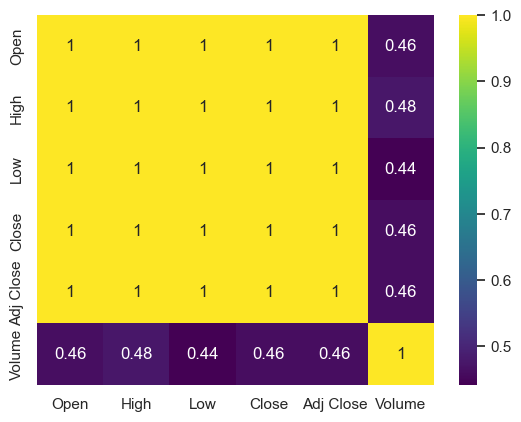

In [107]:
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculating the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Ploting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')


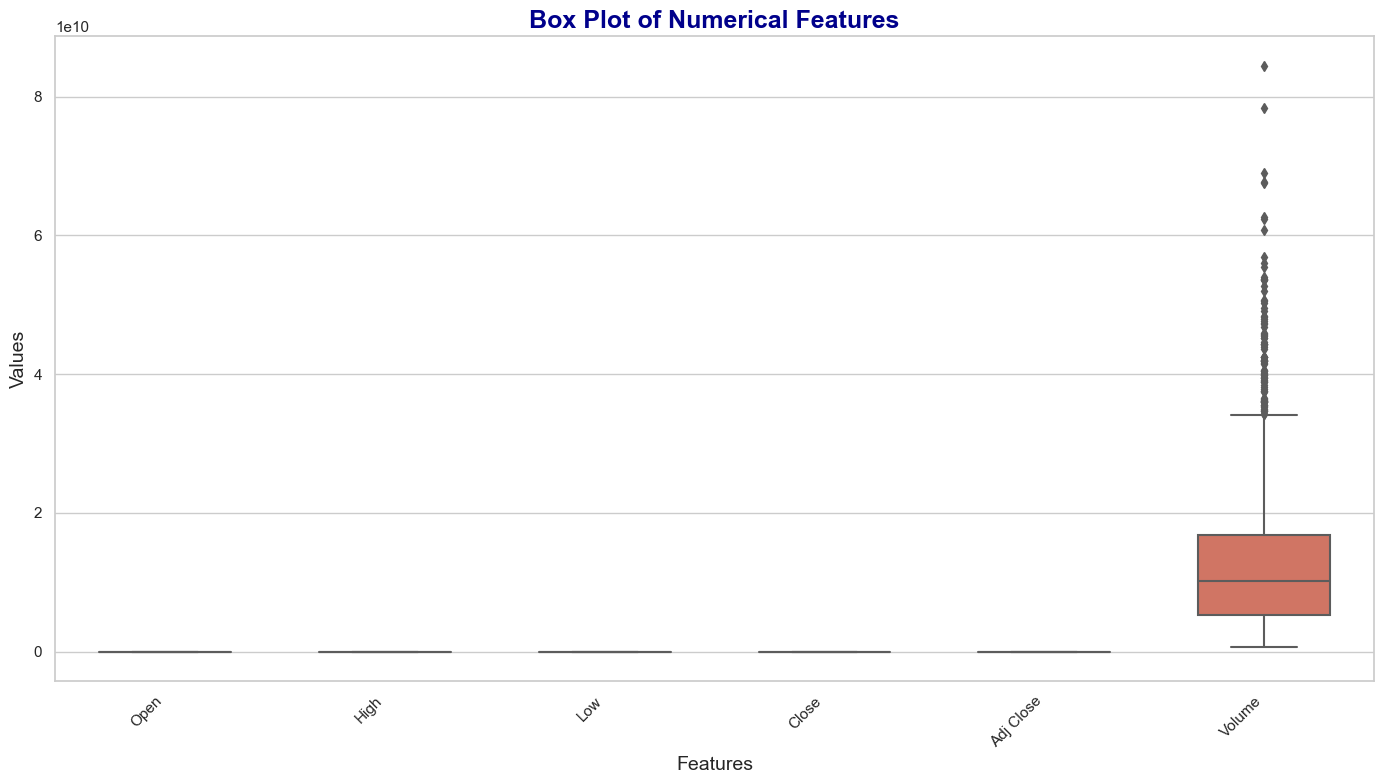

In [108]:

# Select only numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the boxplot with a custom color palette
sns.boxplot(data=numeric_df, palette="coolwarm", width=0.6)

# Add titles and labels for better understanding
plt.title("Box Plot of Numerical Features", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Adjust the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout to avoid clipping
plt.tight_layout()
plt.show()



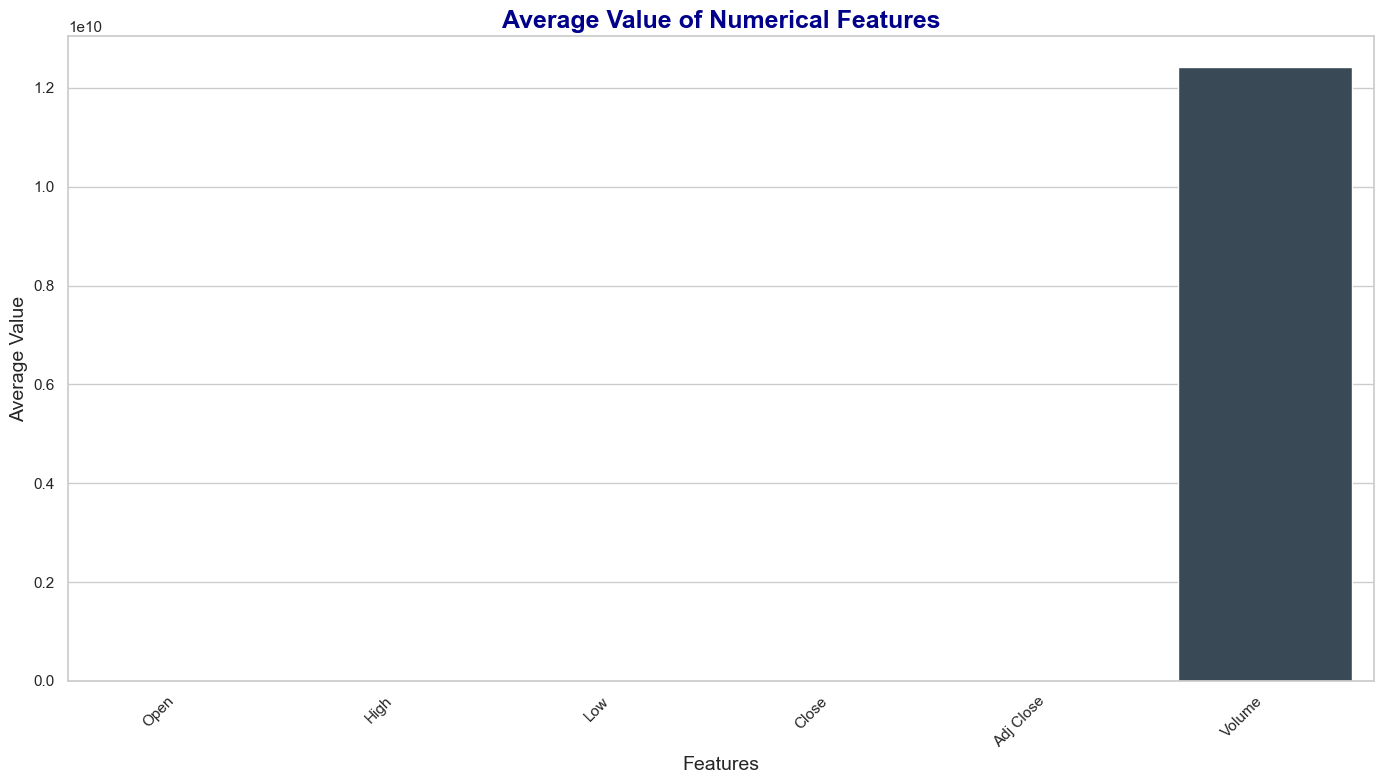

In [109]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a bar plot with a custom color palette for each feature
numeric_means = numeric_df.mean()  # Calculate the mean for each numerical feature
sns.barplot(x=numeric_means.index, y=numeric_means.values, palette="Blues_d")

# Add titles and labels for better understanding
plt.title("Average Value of Numerical Features", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Average Value", fontsize=14)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout to avoid clipping
plt.tight_layout()
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


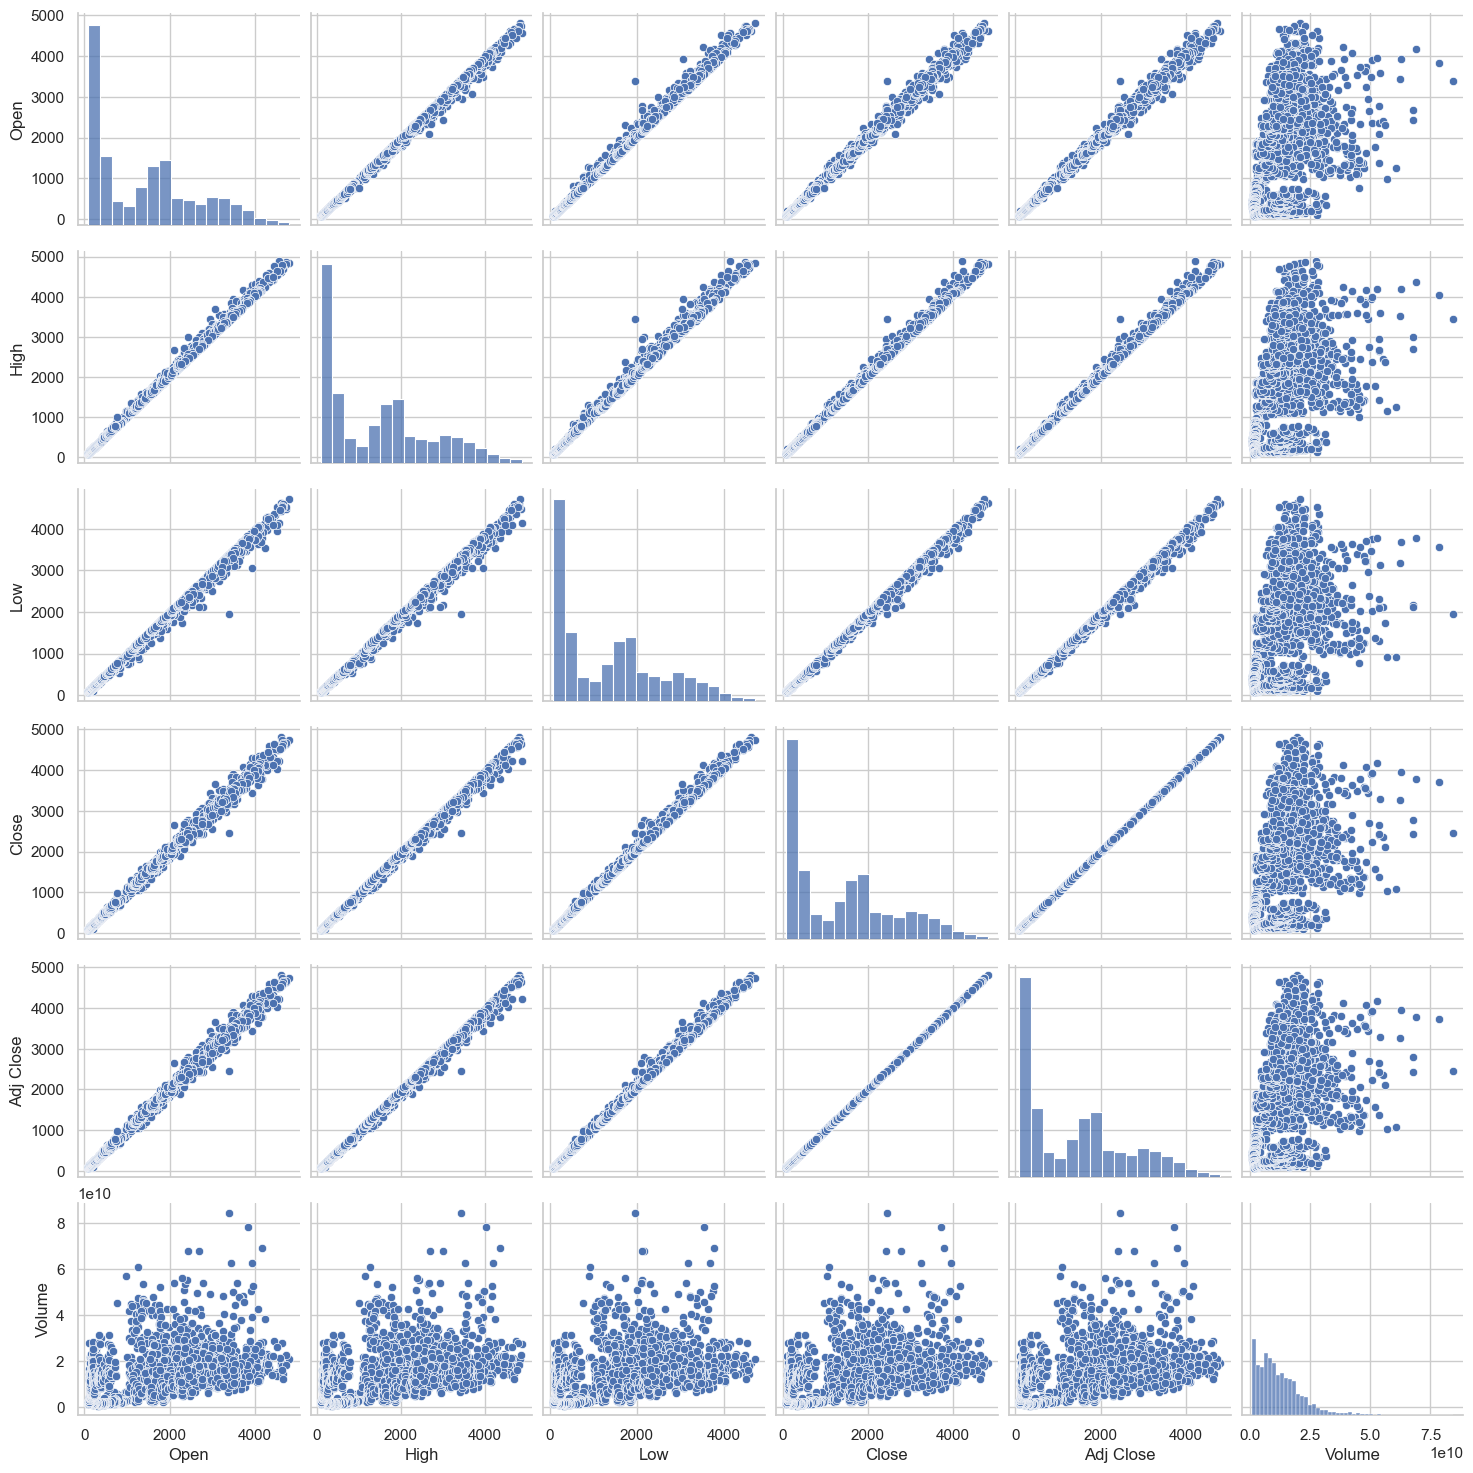

In [51]:
sns.pairplot(df)

In [141]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\4th sem\Business Data Analysis\Research papers and datasets\ETH_USD_daily_data.csv")

# Calculate average price
avg_price = df['Close'].mean()

# Calculate standard deviation
std_dev = df['Close'].std()

# Find maximum and minimum prices with dates
max_price = df['Close'].max()
max_price_date = df[df['Close'] == max_price]['Date'].values[0]

min_price = df['Close'].min()
min_price_date = df[df['Close'] == min_price]['Date'].values[0]

# Calculate average daily volume
avg_volume = df['Volume'].mean()

# ... (Calculate other metrics based on assumptions)

print(f"Average Price: ${avg_price:.2f}")
print(f"Price Volatility (Standard Deviation): ${std_dev:.2f}")
print(f"Maximum Price: ${max_price:.2f} (Date: {max_price_date})")
print(f"Minimum Price: ${min_price:.2f} (Date: {min_price_date})")
print(f"Average Daily Volume: {avg_volume:.2f} ETH")
# ... (Print other calculated metrics)

Average Price: $1423.59
Price Volatility (Standard Deviation): $1206.07
Maximum Price: $4812.09 (Date: 2021-11-08)
Minimum Price: $84.31 (Date: 2018-12-14)
Average Daily Volume: 12424343615.48 ETH


In [110]:
X=df.drop('Open',axis=1)

In [111]:
X.shape

(2496, 6)

In [112]:
y=df['Close']

In [113]:
y.shape

(2496,)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [115]:
X_train.shape

(1747, 6)

In [116]:
X_test.shape

(749, 6)

In [117]:
model=LinearRegression()

In [118]:
# Convert 'Date' to the number of days since the first date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - df['Date'].min()).dt.days

# Now, proceed with splitting the data
X = df.drop(columns=['Close', 'Date'])  # Features excluding the target and Date
y = df['Close']  # Target variable

# Continue with model training and prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_predicted = model.predict(X_test)


In [119]:
# Check the data types of X_train
print(X_train.info())

# Step 1: Handle date columns (if applicable)
# Identify and convert date columns
for col in X_train.select_dtypes(include=['object']):
    try:
        X_train[col] = pd.to_datetime(X_train[col])
        X_train[col] = X_train[col].astype(int) / 10**9  # Convert to Unix timestamp
    except Exception as e:
        print(f"Column '{col}' is not a date column.")

# Step 2: Handle categorical columns
# Convert non-numeric and non-date columns
X_train = pd.get_dummies(X_train, drop_first=True)

# Step 3: Ensure the data is numeric
print(X_train.info())

# Step 4: Fit the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training successful!")

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 0 to 1995
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1996 non-null   float64
 1   High       1996 non-null   float64
 2   Low        1996 non-null   float64
 3   Adj Close  1996 non-null   float64
 4   Volume     1996 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 0 to 1995
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1996 non-null   float64
 1   High       1996 non-null   float64
 2   Low        1996 non-null   float64
 3   Adj Close  1996 non-null   float64
 4   Volume     1996 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.6 KB
None
Model training successful!


# Creating Histogram:

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


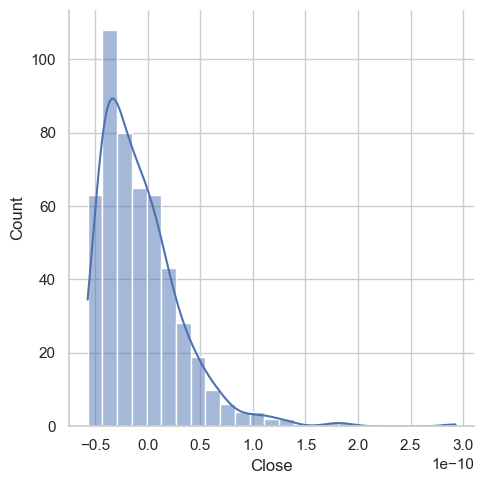

In [120]:
import seaborn as sns
test_residual = y_test - y_predicted
sns.displot(test_residual, bins=25, kde=True)


In [121]:
y_pred=model.predict(X_test)


In [122]:
y_pred

array([1892.51281738, 1908.91699219, 1876.92431641, 1831.95483398,
       1870.78930664, 1904.65185547, 1877.70410156, 1995.06091309,
       1900.22180176, 1873.07641602, 1849.04272461, 1848.60314941,
       1842.40148926, 1796.49060059, 1808.01977539, 1796.11486816,
       1800.50097656, 1817.54992676, 1824.12145996, 1821.85961914,
       1801.72851563, 1812.58947754, 1820.47802734, 1804.53137207,
       1817.53479004, 1854.38061523, 1800.09997559, 1805.95373535,
       1828.68969727, 1831.11828613, 1910.91418457, 1893.078125  ,
       1901.02661133, 1874.13049316, 1862.20141602, 1907.2565918 ,
       1892.41247559, 1890.5135498 , 1811.82836914, 1884.49487305,
       1832.39599609, 1846.30187988, 1840.22521973, 1752.38476563,
       1753.4152832 , 1742.52868652, 1739.03759766, 1650.51928711,
       1665.51977539, 1716.66882324, 1727.20410156, 1720.57751465,
       1737.65942383, 1792.11999512, 1891.00720215, 1872.94299316,
       1892.86206055, 1876.05969238, 1900.50610352, 1859.43286

# Calculating R-Square Value, MSE and RMSE

In [123]:
# let's evalutate whether our y_predicted is how much near the actual y value
from sklearn.metrics import  mean_squared_error,r2_score

In [124]:
MSE = mean_squared_error(y_test,y_predicted)
print(f"The mean square error of model is {MSE}")
print(f"The root mean square error of model is {np.sqrt(MSE)}")


The mean square error of model is 1.5881455204687621e-21
The root mean square error of model is 3.9851543514257536e-11


In [134]:
from sklearn.metrics import r2_score

# Assuming y_test and y_predicted are already defined
performance = r2_score(y_test, y_predicted)
print(f"The r_2 score of the model is {performance:.4f}")

The r_2 score of the model is 1.0000


In [126]:
# let's evalutate whether our y_predicted is how much near the actual y value
from sklearn.metrics import  mean_squared_error,r2_score

In [127]:
MSE = mean_squared_error(y_test,y_predicted)
print(f"The mean square error of model is {MSE}")
print(f"The root mean square error of model is {np.sqrt(MSE)}")

The mean square error of model is 1.5881455204687621e-21
The root mean square error of model is 3.9851543514257536e-11


In [128]:
performance=r2_score(y_test,y_predicted)
print(f"The r_2 score of the model is {performance}")

The r_2 score of the model is 1.0


# Plotting Graphs between Dependent and Independent variables:

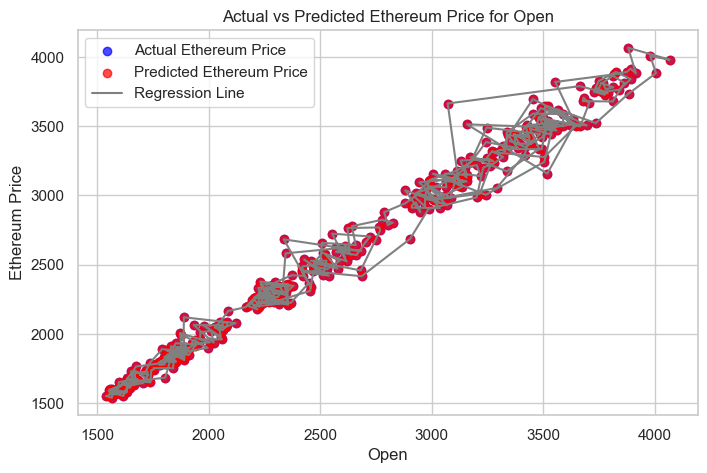

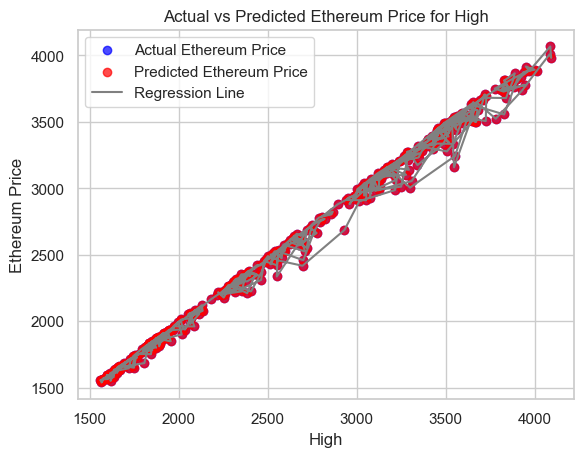

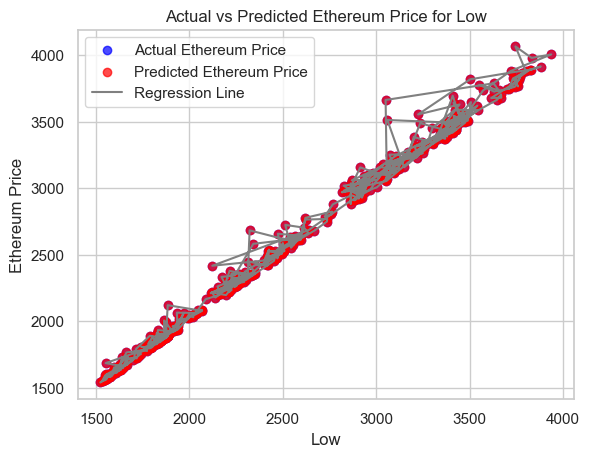

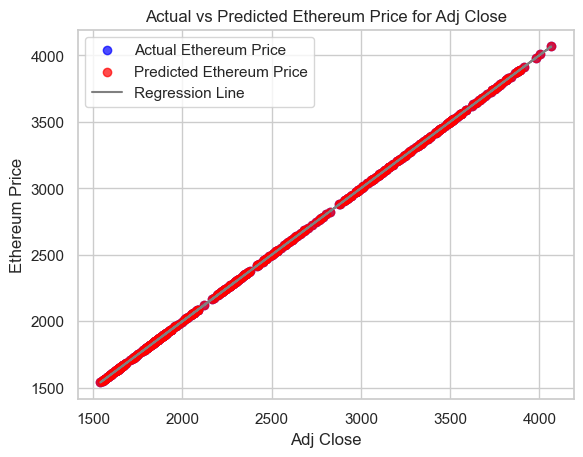

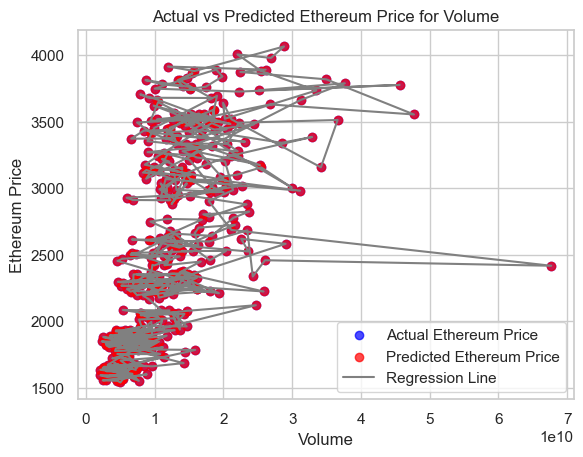

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Assuming you want to plot predictions against 'Close' (or other columns)
for i, feature in enumerate(X_test.columns):
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Ethereum Price', alpha=0.7)
    plt.scatter(X_test[feature], y_predicted, color='red', label='Predicted Ethereum Price', alpha=0.7)
    plt.plot(X_test[feature], y_predicted, color='grey', label='Regression Line')
    plt.title(f'Actual vs Predicted Ethereum Price for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Ethereum Price')
    plt.legend()
    plt.show()



# The Final Historical Data of Etherium (ETH) Coin:

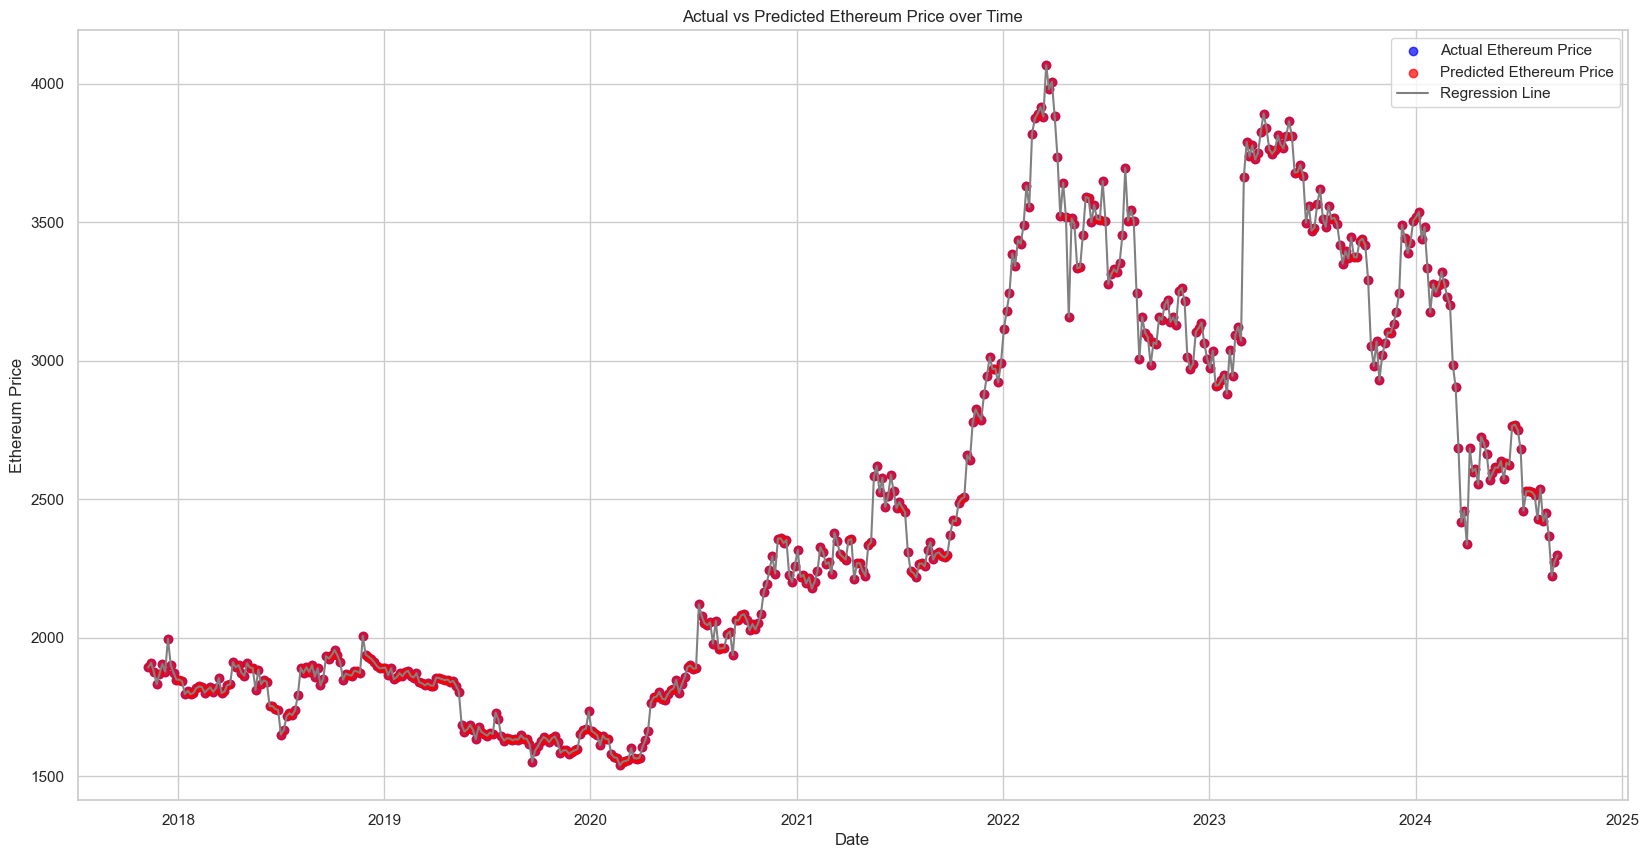

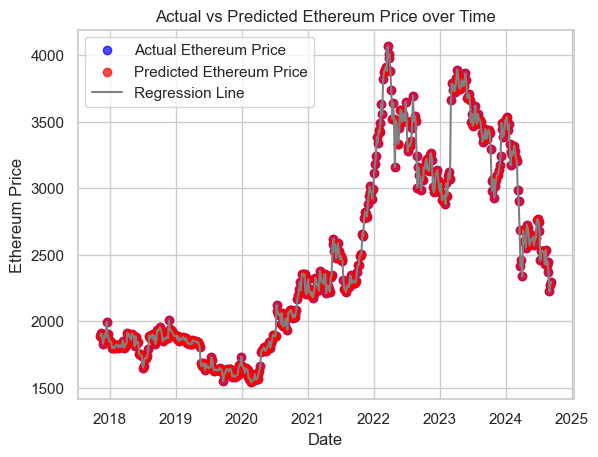

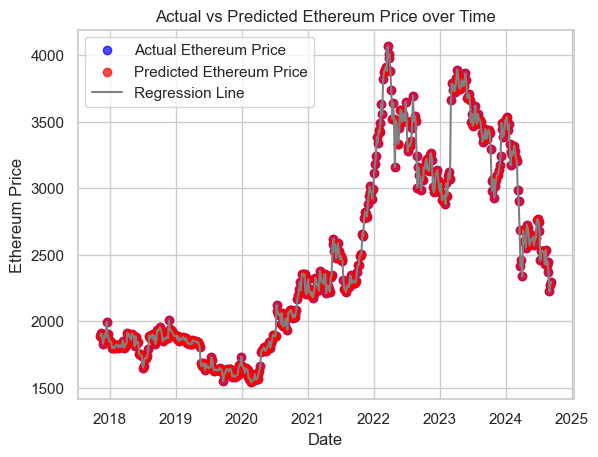

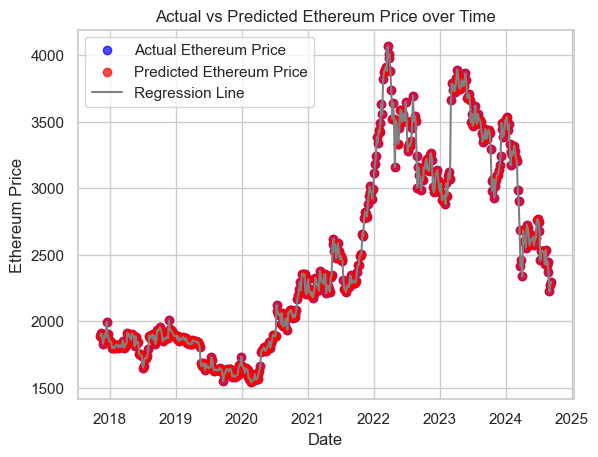

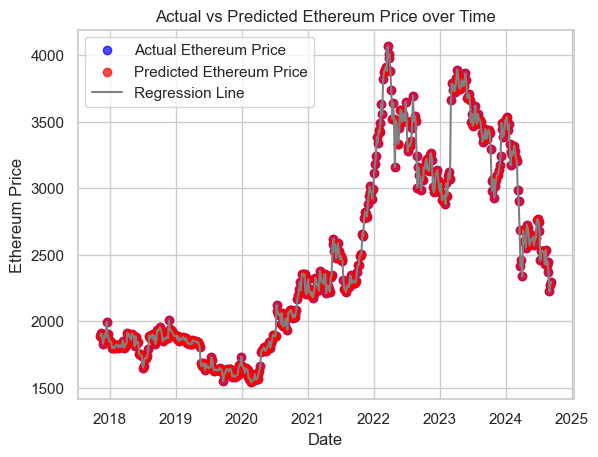

In [133]:

import matplotlib.pyplot as plt

# Assuming your X_test includes the 'Date' column and is indexed correctly
dates = pd.date_range(start='2017-11-09', end='2024-09-08', periods=len(X_test))

plt.figure(figsize=(20, 10))

for i, feature in enumerate(X_test.columns):
    if feature != 'Date':  # Exclude 'Date' column from feature-wise plotting
        plt.scatter(dates, y_test, color='blue', label='Actual Ethereum Price', alpha=0.7)
        plt.scatter(dates, y_predicted, color='red', label='Predicted Ethereum Price', alpha=0.7)
        plt.plot(dates, y_predicted, color='grey', label='Regression Line')
        plt.title(f'Actual vs Predicted Ethereum Price over Time')
        plt.xlabel('Date')
        plt.ylabel('Ethereum Price')
        plt.legend()
        plt.show()